<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Take the csv file and set keys to be column names, and values as the row values for that column
sat_filepath = 'sat_scores.csv'

#Create empty list to contain the values
columns = []
with open(sat_filepath,'r') as f: 
    reader = csv.reader(f)
    for row in reader:
        if columns:
            for i, value in enumerate(row):
                #Check values, if it is possible to convert, convert to int
                try:
                    columns[i].append(int(value))
                except:
                    columns[i].append(value)
        else:
            #Set the values into the columns.
            columns = [[value] for value in row]
    
#The key is the column, and the value is for values in the column.
sat_dict = {c[0] : c[1:] for c in columns}
sat_dict

{'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
import pandas as pd

#Creating a data frame with the sat dictionary.
sat = pd.DataFrame(sat_dict)
sat.dtypes

#The major difference is the ordering of the columns, since we are reading from a csv it is in
#the exact order of the file. In the reading from the dictionary there are high chances of the 
#ordering being different since the keys aren't ordered.

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
#Use the .read_csv() function to read the csv into a data frame
sat = pd.read_csv(sat_filepath)
sat.head(10)

#The dataset contains information for students who take the SAT at the USA. It contains the 50
#states including a row for All representing USA. The Rate represents the percent of students from 
#the state who participated in this survey. The Math and Verbal variables are the average 
#SAT subject score for the states.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
#Dictionary contains the columns as keys,
#The values are type of variable, my description, overall shape of the entire dataset
data_dict = {'State':[sat.State.dtypes, '50 States including statistics for All (USA)'],
             'Rate': [sat.Rate.dtypes, 'Percentage of students who participated by State'],
             'Verbal':[sat.Verbal.dtypes, 'Average SAT verbal score by state'],
             'Math': [sat.Math.dtypes, 'Averate SAT math score by state'],    
             'Shape': [sat.shape]
             }

data_dict
#To get the type of variable use .dtypes using sat.'column name'.dtypes
#To get the shape of the dataset use .shape

{'Math': [dtype('int64'), 'Averate SAT math score by state'],
 'Rate': [dtype('int64'), 'Percentage of students who participated by State'],
 'Shape': [(52, 4)],
 'State': [dtype('O'), '50 States including statistics for All (USA)'],
 'Verbal': [dtype('int64'), 'Average SAT verbal score by state']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

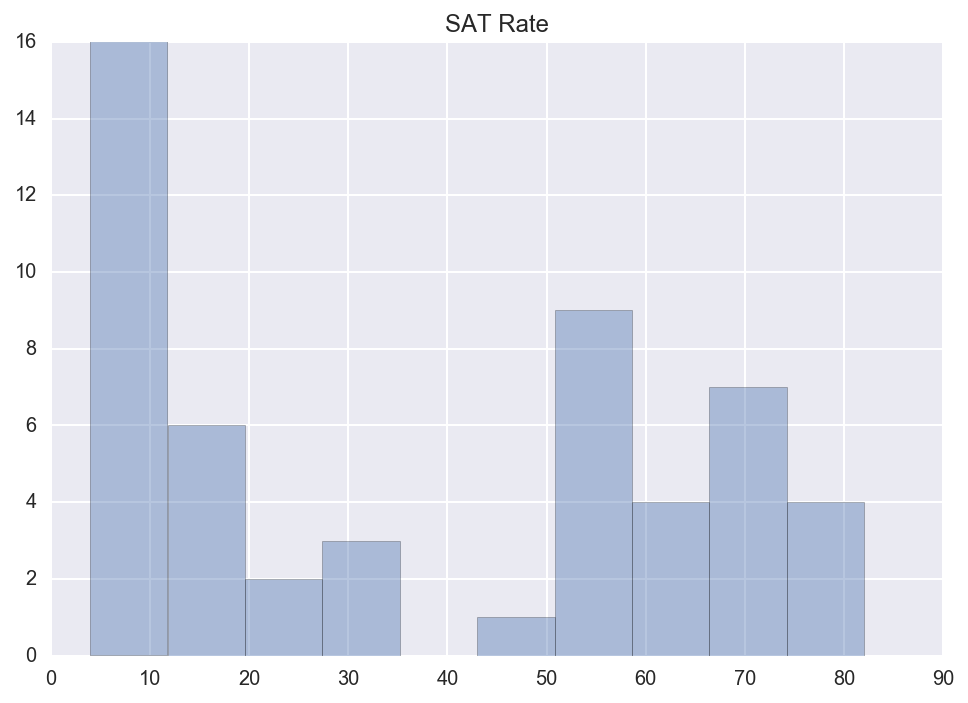

In [6]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#Creating histogram for the variable Rate, Math, and Verbal
sns.distplot(sat[['Rate']],10, kde=False, label = 'Rate')
sns.plt.title('SAT Rate')
plt.show()

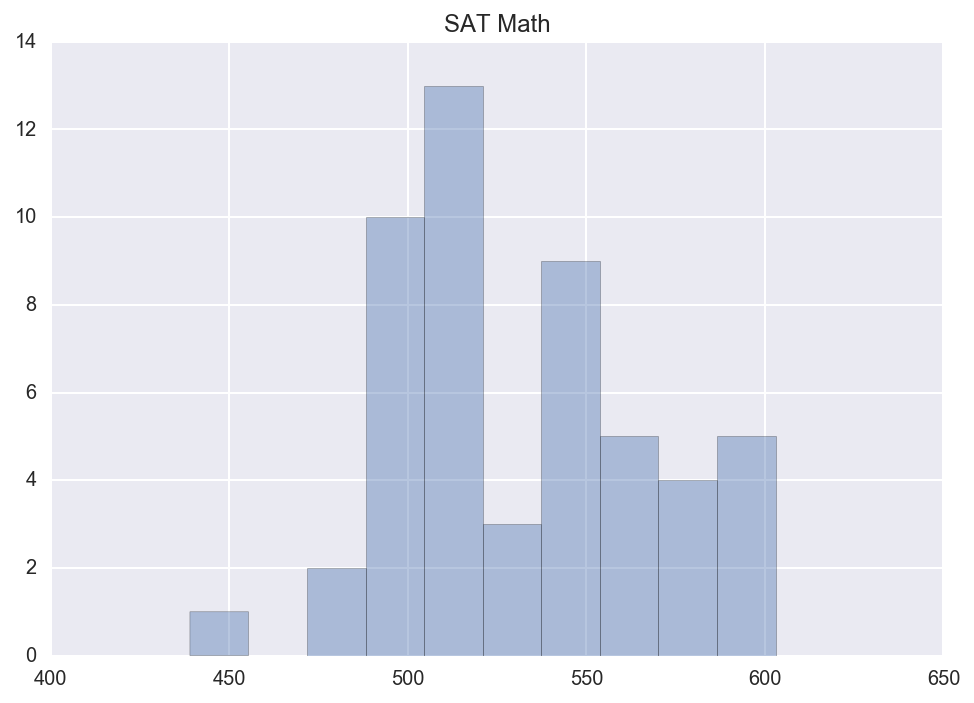

In [7]:
sns.distplot(sat[['Math']],10, kde=False)
sns.plt.title('SAT Math')

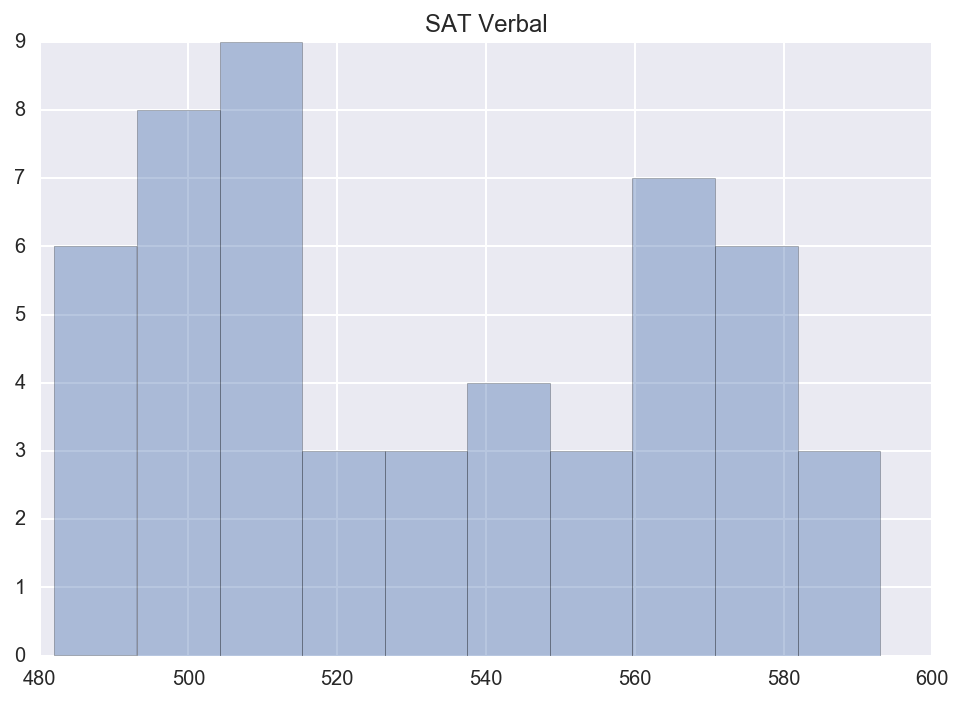

In [8]:
sns.distplot(sat[['Verbal']],10, kde=False)
sns.plt.title('SAT Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

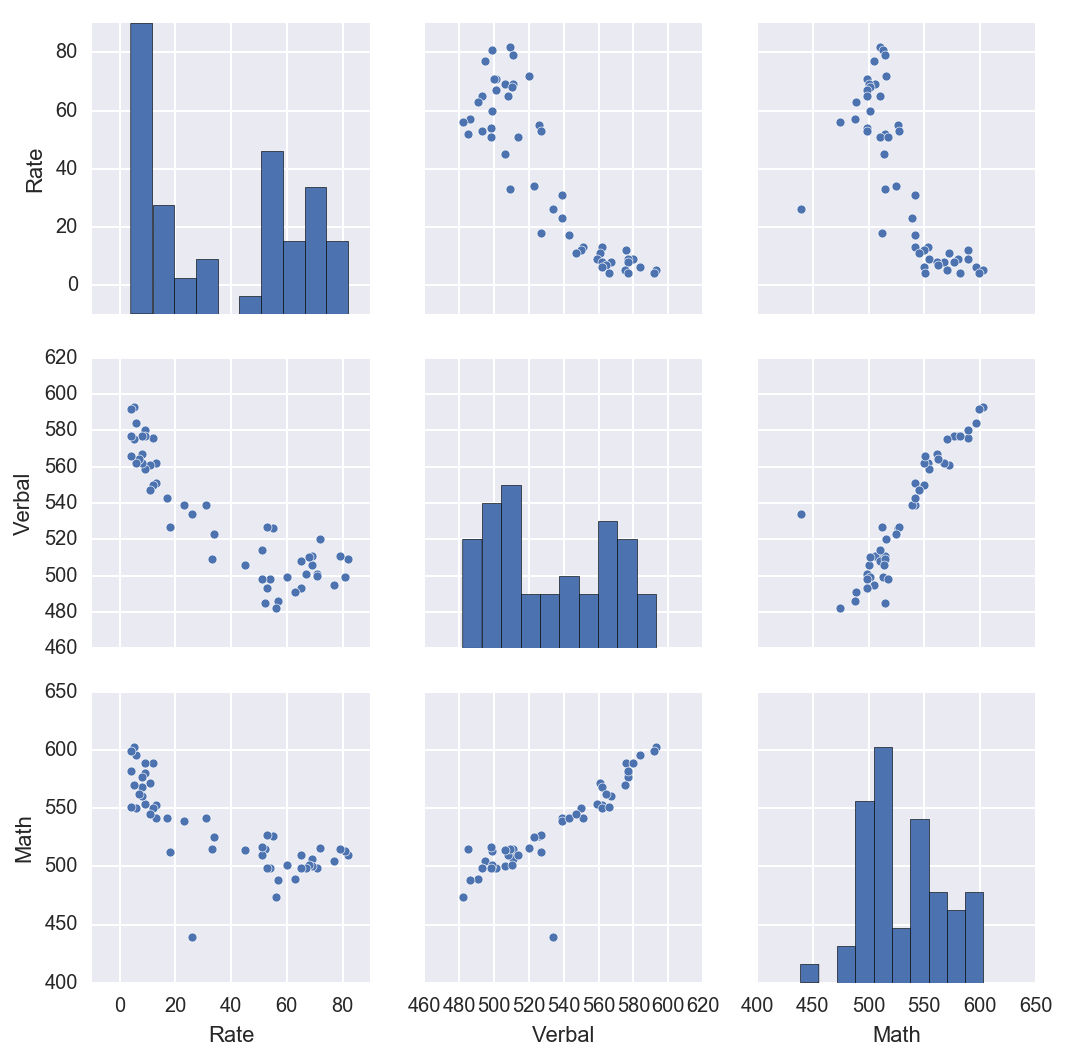

In [9]:
sns.pairplot(sat, size=2.5);

#The pairplot contains scatterplots and histograms comparing each of the 3 variables (Math, Verbal, Rate)with each other. In this case we have 9 graphs. The diagonal graphs are histograms that compare Math against Math, Verbal against Verbal, and Rate against Rate in other words univariate distributions.The scatterplots are joint relationships in which we look at different variables. We can say Math & Verbal are positively related, while Rate & Verbal are negatively related.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

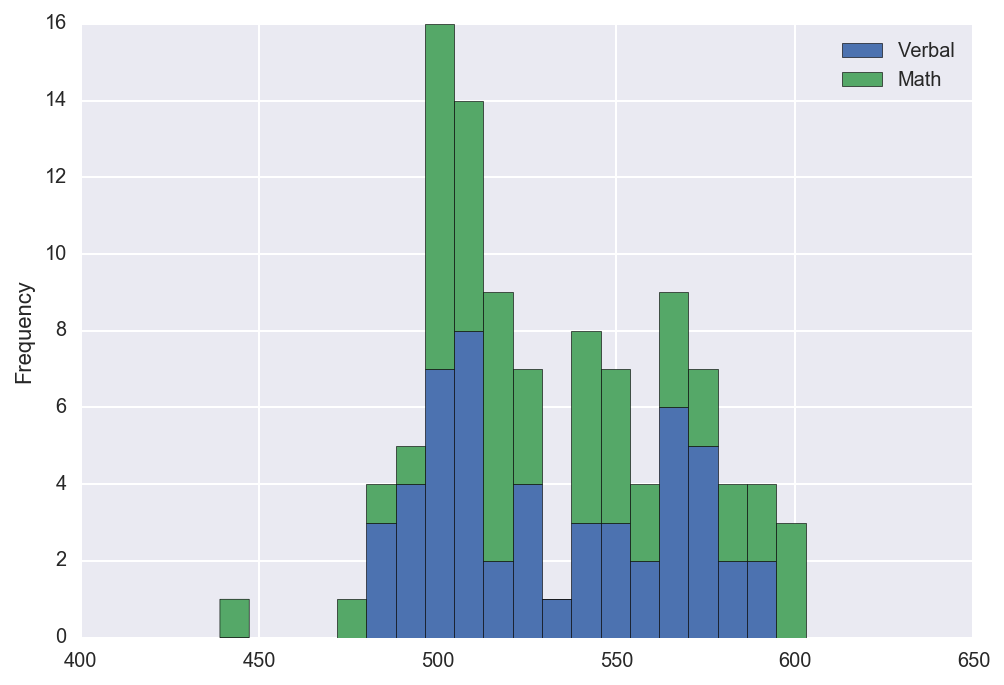

In [10]:
#Take the subset of the dataframe with the columns Verbal and Math
df_sub = sat.loc[0:, ['Verbal', 'Math']]
df_sub.dtypes

#Set the number of bins to 20 for a clear graph this number can be modified.
df_sub.plot.hist(stacked=True, bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

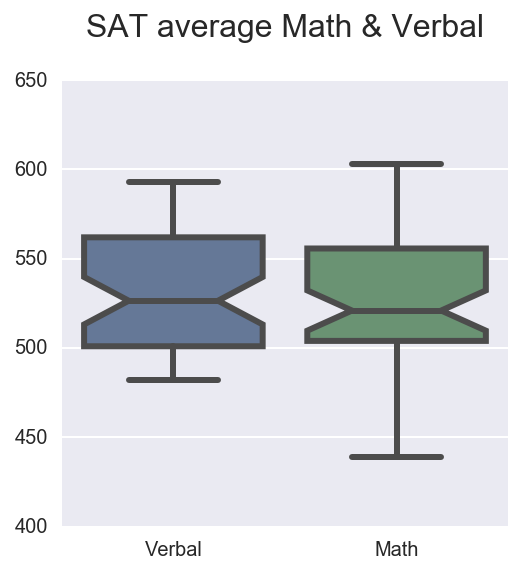

In [11]:
#Boxplot for the subset of Math and Verbal
fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(data=df_sub, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('SAT average Math & Verbal\n', fontsize=16)

plt.show()

#Plotting a boxplot allows people to easily see where the 25th, 50th, and 75th percentile of a 
#dataset is compared to other graphing methods. We can also see whether a dataset is skewed or
#not based on the length of the line, if its longer on the left side its left skewed and similarly
#the other side's condition holds.

#By plotting the rate boxplot with the verbal and math the scale gets changed to 100 instead of 50
#because the rate is the outlier with values under 100 compared to math, verbal which is above 400
#Because of this change it is very difficult to see any difference between the math and verbal boxplot.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


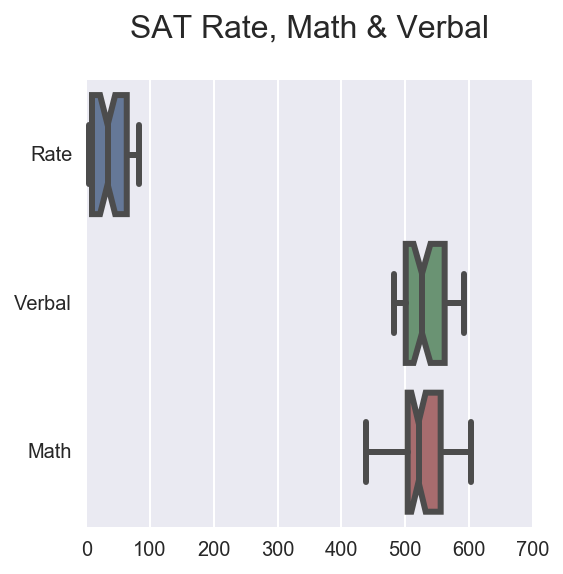

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(data=sat, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('SAT Rate, Math & Verbal\n', fontsize=16)

plt.show()

#Based on this boxplot we can see the rate boxplot is towards the extreme left while the other two are on the right.
#To fix this issue we can normalize the variable by normalized_variable = (sat - np.mean(sat)) / np.std(sat). This
#sets the mean to be 0 and the standard deviation to be 1. By normalization the data will fit all the boxplots 
#approximately into one graph

//anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 52
  yrav = yrav[mask]


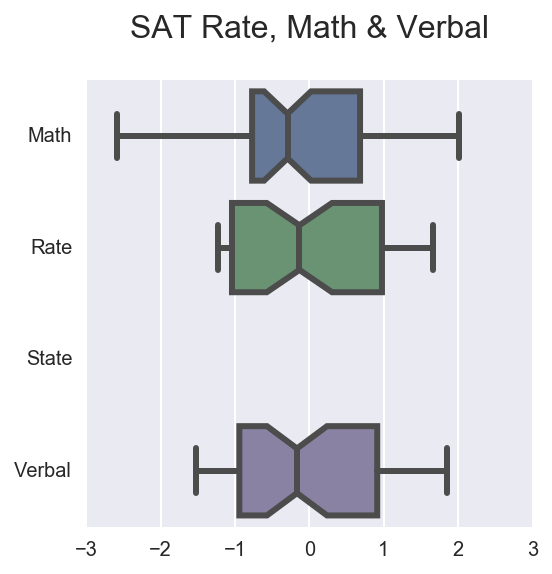

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

normalized_variable = (sat - np.mean(sat)) / np.std(sat)

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(data=normalized_variable, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('SAT Rate, Math & Verbal\n', fontsize=16)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




532.019230769
26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
The number of states greater than the mean is 24


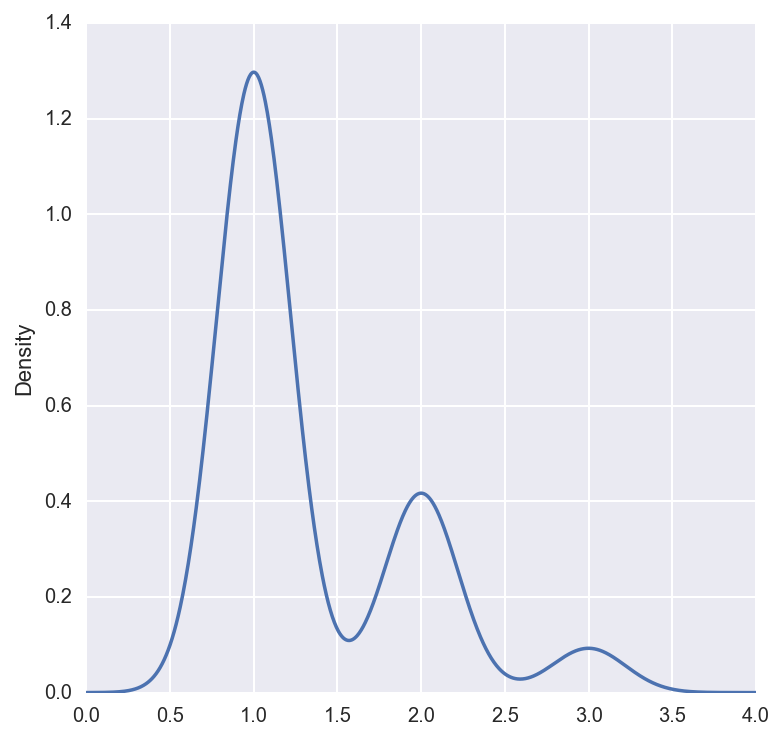

In [14]:
print np.mean(sat.Verbal)
#Created a variable that compares the Verbal score with the mean of Verbal
value = sat['Verbal']> np.mean(sat.Verbal)
print sat.loc[value,'State']
print "The number of states greater than the mean is", len(sat.loc[value])
#The Verbal scores are skewed to the right since there is more values less than the mean(26)
#compared to 24.Below is a distribution of the Verbal score, based on the graph we can see 
#its right skewed

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sat.groupby( ['Verbal'] ).count().unstack().plot(kind="kde", ax=ax)
plt.show()

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
print np.median(sat.Verbal)
#Created a variable that compares the Verbal score to the median.
value_med = sat['Verbal']> np.median(sat.Verbal)
print sat.loc[value_med,'State']
print "The number of states greater than the median is", len(sat.loc[value_med])

#The number of states greater than the median is 26. It contains the mean number of states as
#a subset along with two additional states 'WA' and 'WV'. Since its a median we can predict the 
#number of states greater to be either 25 or 26 which is true in this case. 

526.5
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
The number of states greater than the median is 26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
#Using .loc to subset the df to Math.
total = sat.Verbal - sat.Math
sat['Difference'] = total
#Convert the series to a data frame.
sat[['Difference']]

,Difference
0,-1
1,-14
2,-4
3,-10
4,4
5,2
6,1
7,5
8,6
9,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
#Sorting the values by Difference in ascending order
first_df = sat.sort_values(by='Difference', ascending=False)
total = sat.Math - sat.Verbal


#Print the 3 states in each data frame
print first_df.head(3)

#Drop the additional column of Difference
sat.drop('Difference', axis=1, inplace=True)

#Set the Inverse Difference to be the math mean - verbal mean
sat['InvDiff'] = total
second_df = sat.sort_values(by="InvDiff", ascending=False)
print second_df.head(3)

   State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15
   State  Rate  Verbal  Math  InvDiff
21    HI    52     485   515       30
23    CA    51     498   517       19
1     NJ    81     499   513       14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


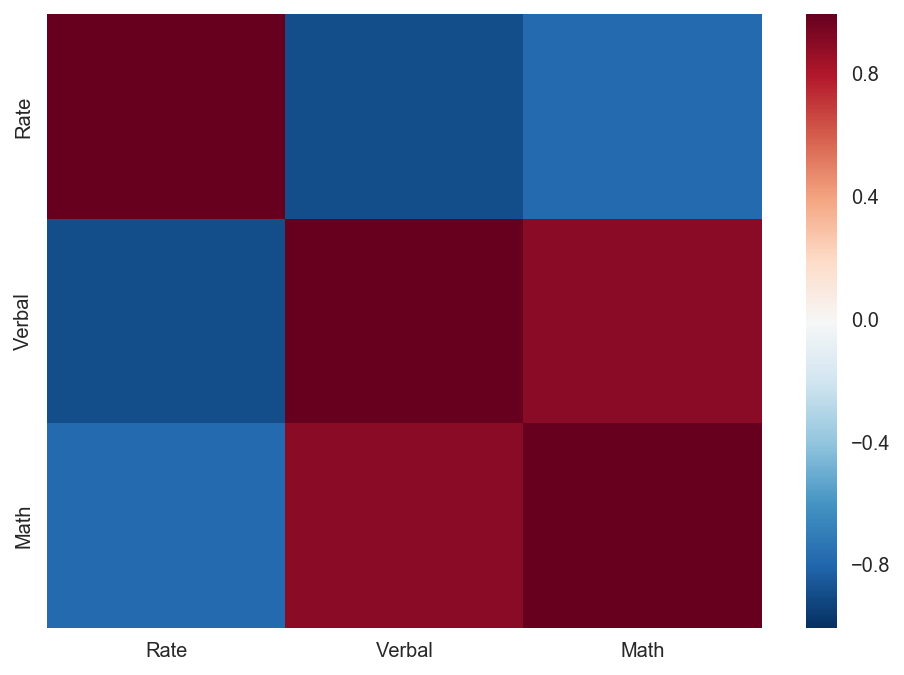

In [18]:
import numpy as np
sat.drop('InvDiff', axis=1, inplace=True)
#Used the heatmap for a visual representation.
sns.heatmap(sat.corr())
#The correlation matrix shows the correlation between the values of one variable compared to
#the values of the other variable. The diagonal values will be 1, since it compares the values
#to itself. A value of -1 is considered a perfect negative correlation and a value of 1 is
#considered a perfect positive correlation, and a value close to 0 is considered no correlation.
#Based on this correlation matrix we can see Verbal and Math have a high positive correlation while
#Rate and Verbal have a high negative correalation. Math and Rate have a medium negative
#correlation

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [19]:
print sat.describe()

#Count is the number of rows in the dataframe
#The mean is the average of the values in the dataset
#std is the standard deviation which is the variation of the dataset
#The min is the minimum value
#25% is the 25th percentile (25% of the data is below this value)
#50% is the median the middle value in the dataset
#75% is the 75th percentile(25% of the data is above this value)
#max is the maximum value in the dataset

            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

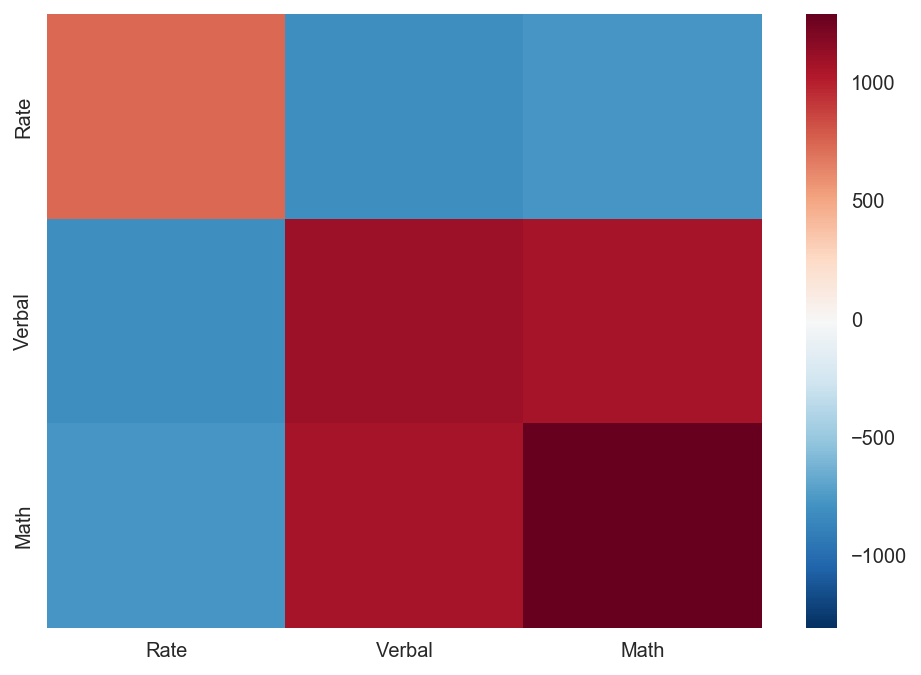

In [20]:
#Used a heatmap for visual representation
sns.heatmap(sat.cov())
#The covariance is when we compare how much two random variables change together. In our case
#we would look at the comparison between the variables Rate, Verbal, and Math. There is no
#range hence it is often difficult to understand what the results mean.

#To convert covariance to correlation we would divide the covariance by the product of the
#standard deviation of X and Y. 

#The correlation matrix results in a value between -1 and 1 which is easier to analyze and 
#describe data. If the value is close to -1 its leaning toward a negative correlation while if
#the value is closer to 1 its leaning toward a positive correlation. A value close to 0 means
#there is no correlation between the two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [21]:
#Load the data into the csv, and converted the string values to float.
#In the next part I converted the empty cells to nan
drug_data_filepath = 'drug-use-by-age.csv'
import csv
columns = []
with open(drug_data_filepath,'rU') as f: 
    reader = csv.reader(f)
    for row in reader:
        if columns:
            for i, value in enumerate(row):
                try:
                    columns[i].append(float(value))
                except:
                    columns[i].append(value)
        else:
            # first row
            columns = [[value] for value in row]
drug_dict = {c[0] : c[1:] for c in columns}
drug = pd.DataFrame(drug_dict)
drug
#Yes the data requires cleaning since there are variables missing, this would affect the 
#calculation for covariance and correlation. The values were originally strings and I 
#converted them to floats since its of higher precedence than int. The missing values 
#will affect the info as well as the describe call. My approach will be to conver the 
#- to Na and calculate the mean and median without considering the NaN.

,age,alcohol-frequency,alcohol-use,cocaine-frequency,cocaine-use,crack-frequency,crack-use,hallucinogen-frequency,hallucinogen-use,heroin-frequency,...,oxycontin-frequency,oxycontin-use,pain-releiver-frequency,pain-releiver-use,sedative-frequency,sedative-use,stimulant-frequency,stimulant-use,tranquilizer-frequency,tranquilizer-use
0,12,3.0,3.9,5,0.1,-,0.0,52.0,0.2,35.5,...,24.5,0.1,36.0,2.0,13.0,0.2,2.0,0.2,52.0,0.2
1,13,6.0,8.5,1,0.1,3,0.0,6.0,0.6,-,...,41,0.1,14.0,2.4,19.0,0.1,4.0,0.3,25.5,0.3
2,14,5.0,18.1,5.5,0.1,-,0.0,3.0,1.6,2,...,4.5,0.4,12.0,3.9,16.5,0.2,12.0,0.8,5.0,0.9
3,15,6.0,29.2,4,0.5,9.5,0.1,4.0,2.1,1,...,3,0.8,10.0,5.5,30.0,0.4,6.0,1.5,4.5,2.0
4,16,10.0,40.1,7,1.0,1,0.0,3.0,3.4,66.5,...,4,1.1,7.0,6.2,3.0,0.2,9.5,1.8,11.0,2.4
5,17,13.0,49.3,5,2.0,21,0.1,3.0,4.8,64,...,6,1.4,9.0,8.5,6.5,0.5,9.0,2.8,7.0,3.5
6,18,24.0,58.7,5,3.2,10,0.4,4.0,7.0,46,...,7,1.7,12.0,9.2,10.0,0.4,8.0,3.0,12.0,4.9
7,19,36.0,64.6,5.5,4.1,2,0.5,3.0,8.6,180,...,7.5,1.5,12.0,9.4,6.0,0.3,6.0,3.3,4.5,4.2
8,20,48.0,69.7,8,4.9,5,0.6,2.0,7.4,45,...,12,1.7,10.0,10.0,4.0,0.5,12.0,4.0,10.0,5.4
9,21,52.0,83.2,5,4.8,17,0.5,4.0,6.3,30,...,13.5,1.3,15.0,9.0,9.0,0.3,10.0,4.1,7.0,3.9


### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [22]:
drug = pd.DataFrame(drug_dict) 
print "-----------------------INFO-----------------------\n"
print drug.info()
print "-----------------------ISIN-----------------------\n"
print drug.isin(['-'])
drug = drug.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('-', np.nan)
print "-----------------------MEAN-----------------------\n"
print drug.mean(axis=0, skipna=True)
print "-----------------------MEDIAN-----------------------\n"
print drug.median(axis = 0, skipna = True)
print "-----------------------DESCRIBE-----------------------\n"
print drug.describe()
print "-----------------------DRUG-----------------------\n"
drug

#The dataset contains statistic for the number of drug use and frequency amongst different
#age groups starting from 12 until 65. It contains information for different drug type 
#including alcohol, oxycontin,sedative, and etc. By looking at the info we have 21 rows 
#of float and 7 objects. However using the info doesn't tell all the empty cells, since 
#in this dataset a - is used in place of an empty cell. Using the .isin function I was able 
#to see the cells where the values contained - with a True or False value. I later converted 
#the - to NaN. By running the describe command I noticed crack, and sedative uses were not as 
#popular in number compared to alcohol and marijuana. I have also included 3 scatter plots 
#that visualize the correlation between 6 different variables.

-----------------------INFO-----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
alcohol-frequency          17 non-null float64
alcohol-use                17 non-null float64
cocaine-frequency          17 non-null object
cocaine-use                17 non-null float64
crack-frequency            17 non-null object
crack-use                  17 non-null float64
hallucinogen-frequency     17 non-null float64
hallucinogen-use           17 non-null float64
heroin-frequency           17 non-null object
heroin-use                 17 non-null float64
inhalant-frequency         17 non-null object
inhalant-use               17 non-null float64
marijuana-frequency        17 non-null float64
marijuana-use              17 non-null float64
meth-frequency             17 non-null object
meth-use                   17 non-null float64
n                          17 non-null float64
oxyco

//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,alcohol-frequency,alcohol-use,cocaine-frequency,cocaine-use,crack-frequency,crack-use,hallucinogen-frequency,hallucinogen-use,heroin-frequency,...,oxycontin-frequency,oxycontin-use,pain-releiver-frequency,pain-releiver-use,sedative-frequency,sedative-use,stimulant-frequency,stimulant-use,tranquilizer-frequency,tranquilizer-use
0,12,3.0,3.9,5.0,0.1,NaN,0.0,52.0,0.2,35.5,...,24.5,0.1,36.0,2.0,13.0,0.2,2.0,0.2,52.0,0.2
1,13,6.0,8.5,1.0,0.1,3.0,0.0,6.0,0.6,NaN,...,41.0,0.1,14.0,2.4,19.0,0.1,4.0,0.3,25.5,0.3
2,14,5.0,18.1,5.5,0.1,NaN,0.0,3.0,1.6,2.0,...,4.5,0.4,12.0,3.9,16.5,0.2,12.0,0.8,5.0,0.9
3,15,6.0,29.2,4.0,0.5,9.5,0.1,4.0,2.1,1.0,...,3.0,0.8,10.0,5.5,30.0,0.4,6.0,1.5,4.5,2.0
4,16,10.0,40.1,7.0,1.0,1.0,0.0,3.0,3.4,66.5,...,4.0,1.1,7.0,6.2,3.0,0.2,9.5,1.8,11.0,2.4
5,17,13.0,49.3,5.0,2.0,21.0,0.1,3.0,4.8,64.0,...,6.0,1.4,9.0,8.5,6.5,0.5,9.0,2.8,7.0,3.5
6,18,24.0,58.7,5.0,3.2,10.0,0.4,4.0,7.0,46.0,...,7.0,1.7,12.0,9.2,10.0,0.4,8.0,3.0,12.0,4.9
7,19,36.0,64.6,5.5,4.1,2.0,0.5,3.0,8.6,180.0,...,7.5,1.5,12.0,9.4,6.0,0.3,6.0,3.3,4.5,4.2
8,20,48.0,69.7,8.0,4.9,5.0,0.6,2.0,7.4,45.0,...,12.0,1.7,10.0,10.0,4.0,0.5,12.0,4.0,10.0,5.4
9,21,52.0,83.2,5.0,4.8,17.0,0.5,4.0,6.3,30.0,...,13.5,1.3,15.0,9.0,9.0,0.3,10.0,4.1,7.0,3.9


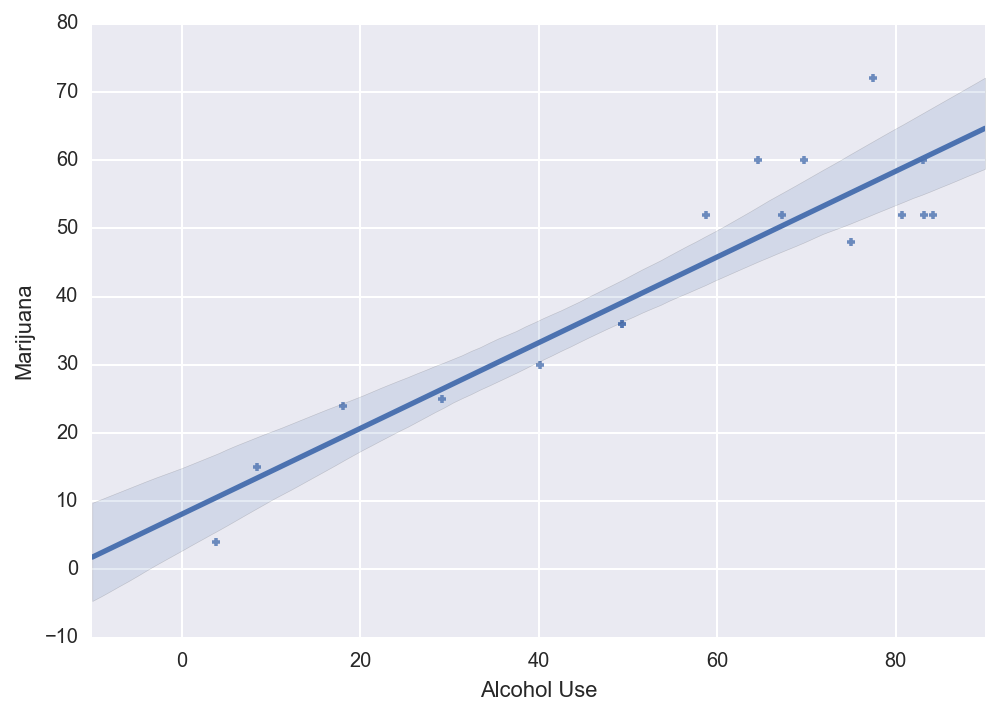

In [23]:
x, y = pd.Series(drug['alcohol-use'], name="Alcohol Use"), pd.Series(drug['marijuana-frequency'], name="Marijuana")
ax = sns.regplot(x=x, y=y, marker="+")
#High positive correlation.

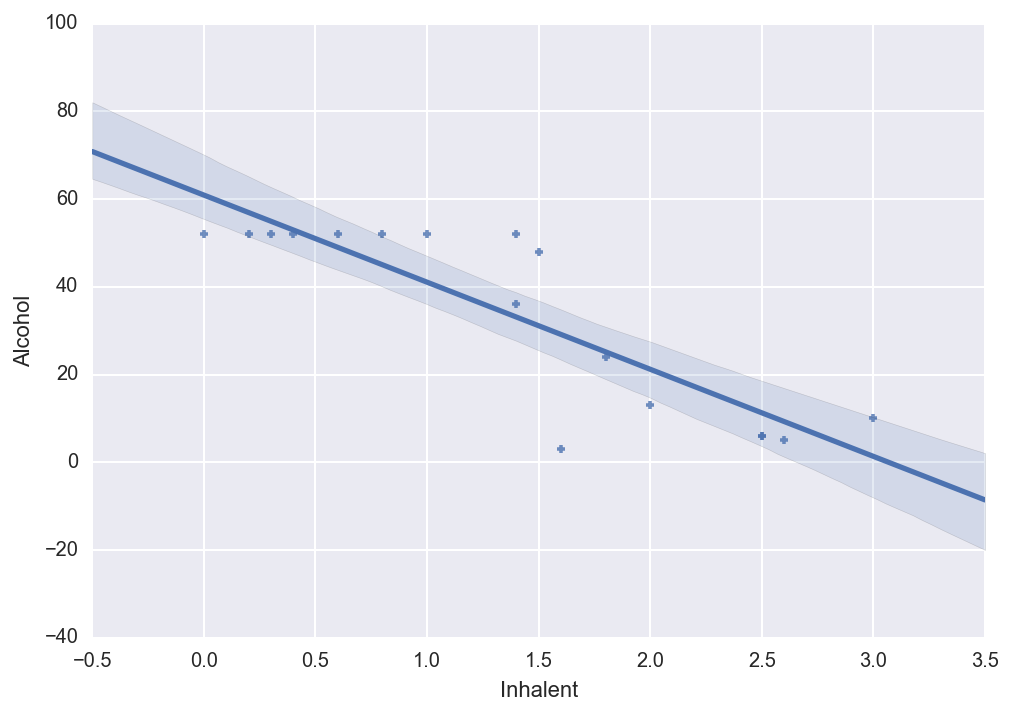

In [24]:
x, y = pd.Series(drug['inhalant-use'], name="Inhalent"), pd.Series(drug['alcohol-frequency'], name="Alcohol")
ax = sns.regplot(x=x, y=y, marker="+")
#High negative correlation

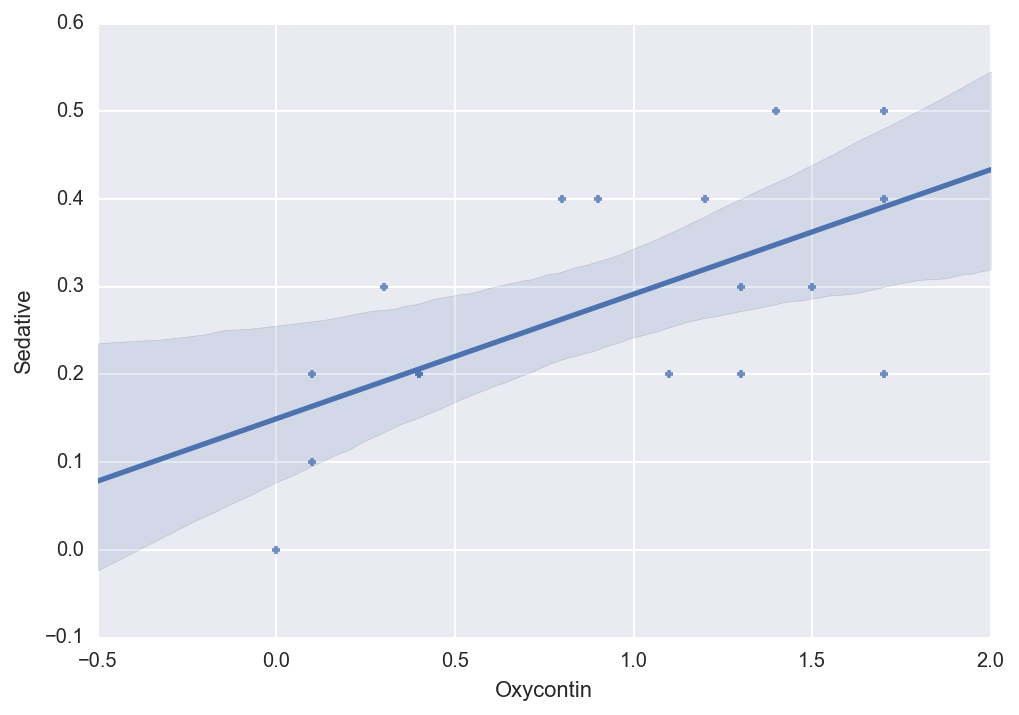

In [25]:
x, y = pd.Series(drug['oxycontin-use'], name="Oxycontin"), pd.Series(drug['sedative-use'], name="Sedative")
ax = sns.regplot(x=x, y=y, marker="+")
#Medium positive regression

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

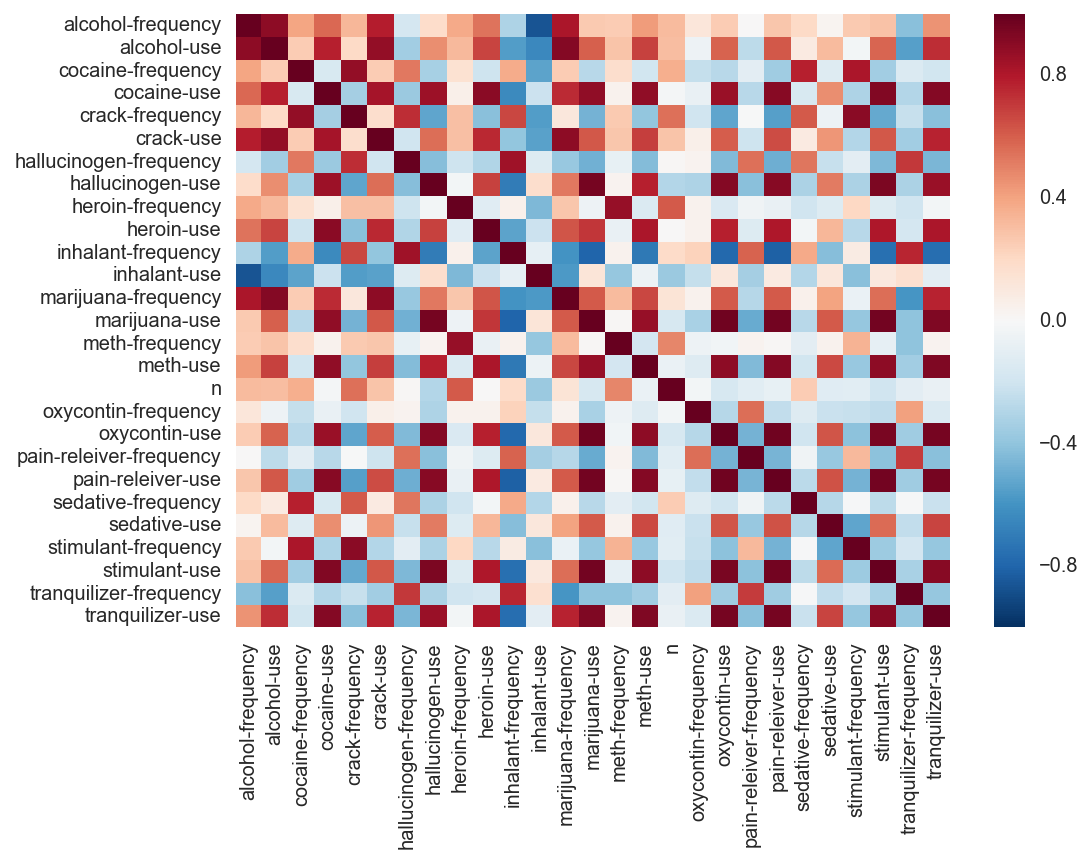

In [26]:
#Hypothesis:
#Is there a high (0.85 or higher) positive correlation between alcohol use and 
#marijuana use amongst the age group?
sns.heatmap(drug.corr())

#Description:
#I will report on the variables correlation using the heatmap with the .corr function. After
#seeing the color and removing the heatmap parameter we can see the correlation value. By 
#testing the hypothesis it would be best to add a scatterplot comparing the points to see the
#correlation.

#Some EDA techniques, include checking the mean and median for all the variables to see if there 
#is a possible correlation between the variables. Visually we could use a pairplot to check 
#between the two variables to see if there is a correlation. I used the .info and .describe to 
#see the percentile between the two variables

#Report
#Looking at the heat map of the correlation we can visually see the relationship 
#between some of the variable. By looking into the two columns alcohol use and marijuana
#use we can see the type of correlation. Based on the heat map its a color of dark orange hence
#we can say its close to a medium correlation. By removing the heat map and seeing the values
#we can see its 0.59 which is about 0.3 away from our hypothesis. Thus we can reject the hypothesis.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [27]:
#Create the covariance matrix for the drug dataset since 6.3 is similar.
drug.cov()
#What is the difference between the covariance and correlation matrix?

#The correlation matrix is the relationship between two values as in how  
#one item effects a change in another item. The value is between -1 and 1, in which -1 is a
#negative relationship and 1 is a positive relationship. A value closer to 1 is considered a
#strong relationship while a value close to 0 is considered of no use. Covariance is similar
#to correlation however it describes how two items tend to vary together. A positive value is
#higher than average while a negative value is lower than average.

#Why is the correlation matrix preferred to the covariance matrix for EDA?   

#The correlation matrix is of better use since it is easier to understand the value and it doesn't
#depend on units or the type of data. It is more universal to all datasets in the fact that 
#negative values are of negative correlation and positive value is of positive correlation.

,alcohol-frequency,alcohol-use,cocaine-frequency,cocaine-use,crack-frequency,crack-use,hallucinogen-frequency,hallucinogen-use,heroin-frequency,heroin-use,...,oxycontin-frequency,oxycontin-use,pain-releiver-frequency,pain-releiver-use,sedative-frequency,sedative-use,stimulant-frequency,stimulant-use,tranquilizer-frequency,tranquilizer-use
alcohol-frequency,454.492647,514.513971,67.591667,22.371324,119.607143,3.945956,-55.841912,10.845956,556.181250,3.886397,...,32.904167,3.261765,1.047794,18.948529,106.637868,0.087868,477.101103,8.755882,-101.619485,16.766544
alcohol-use,514.513971,722.473456,56.591667,37.770110,84.153297,5.560184,-139.762868,34.805184,568.791250,6.078971,...,-18.487500,9.632647,-49.159559,52.556544,60.909926,1.180551,-64.970221,22.030074,-169.944853,34.676691
cocaine-frequency,67.591667,56.591667,64.616667,-2.351667,135.798077,0.465000,65.575000,-7.386667,86.190476,-0.550000,...,-24.358333,-1.284167,-5.783333,-8.306667,159.370833,-0.123333,39.745833,-3.778333,-13.662500,-2.580833
cocaine-use,22.371324,37.770110,-2.351667,3.300662,-10.304945,0.357978,-10.039706,4.341103,7.374792,0.545699,...,-1.717500,0.956507,-3.451103,5.215515,-7.218566,0.115809,-48.308824,2.362941,-6.153493,2.932022
crack-frequency,119.607143,84.153297,135.798077,-10.304945,328.017857,0.659341,146.148352,-25.780220,405.128205,-2.546703,...,-46.686813,-5.103846,-0.104396,-26.786538,303.717033,-0.135165,98.737637,-12.098352,-21.858516,-11.242857
crack-use,3.945956,5.560184,0.465000,0.357978,0.659341,0.055588,-0.703676,0.366213,4.842917,0.059081,...,0.165833,0.086471,-0.333088,0.487316,0.536765,0.014265,-5.964706,0.205110,-0.936029,0.319412
hallucinogen-frequency,-55.841912,-139.762868,65.575000,-10.039706,146.148352,-0.703676,225.007353,-17.922426,-222.902083,-1.516912,...,6.429167,-4.034191,56.941176,-23.187132,198.582721,-0.479779,-134.095588,-9.551471,121.584559,-12.046324
hallucinogen-use,10.845956,34.805184,-7.386667,4.341103,-25.780220,0.366213,-17.922426,7.798088,-5.370625,0.637206,...,-10.983333,1.557096,-8.133088,8.040441,-21.688235,0.199890,-76.792831,3.695110,-10.079779,4.225037
heroin-frequency,556.181250,568.791250,86.190476,7.374792,405.128205,4.842917,-222.902083,-5.370625,4912.632292,-2.829167,...,31.309524,-6.286250,-20.825000,-15.880417,-357.988542,-1.308125,1271.230208,-13.292292,-160.062500,-3.015417
heroin-use,3.886397,6.078971,-0.550000,0.545699,-2.546703,0.059081,-1.516912,0.637206,-2.829167,0.111397,...,0.168333,0.157390,-0.314706,0.851654,-0.196507,0.015368,-7.977022,0.379632,-0.672610,0.479044


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [28]:
#How is the covariance matrix calculated?
#The covariance matrix is calculated by taking the sum from 1 to n of (Xi - X)(Yi-Y) divided by 
#n-1 in which Xi and Yi are values and X, and Y are the mean of the values. In our case we would
#take into consideration the mean of Rate, Verbal, Math, as well as the values from the dataset
#to calculate the covariance.

#How is the correlation matrix calculated?
#The correlation matrix is calculated from the covariance divided by the product of the 
#standard deviation of X and Y: cov(X,Y)/(std(X)*std(Y)). Since we have the covariance calculate
#we would need to calculate the standard deviation for X and Y and multiply them and divide it
#from the covariance.

#Based on the explicit formulas, what is the primary differences between the two?
#The primary difference is the correlation matrix builds from the covariance matrix. The 
#correlation matrix is more of use since its between a range and its easy to analyze correlation 
#between two variables

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [29]:
#Are there outliers in the dataset?
#No there aren't outliers in the dataset, by checking for values above the 3 and below the 3
#std we can check to see if there are outliers. By creating a boxplot and passing the fliersize 
#parameter we can check for outliers, in this case there were no points seen.

math_out = np.mean(df_sub['Math']) + (np.std(df_sub['Math']) * 3)
verb_out = np.mean(df_sub['Verbal']) + (np.std(df_sub['Verbal']) * 3)
math_low = np.mean(df_sub['Math']) - (np.std(df_sub['Math']) * 3)
verb_low = np.mean(df_sub['Verbal']) - (np.std(df_sub['Verbal']) * 3)
print "The outliers for Math are not between",math_low,"and",math_out
print "The outleirs for Verbal are not between", verb_low, "and", verb_out
i = 0
while i < len(df_sub):
    if df_sub['Math'][i] > math_out or df_sub['Math'][i] < math_low:
        print "Outlier for Math",df_sub['Math'][i]
    else:
        pass
    if df_sub['Verbal'][i] > verb_out or df_sub['Verbal'][i] < verb_low:
        print "Outlier for Verbal",df_sub['Verbal'][i]
    else:
        pass
    i += 1

df_sub.describe()

The outliers for Math are not between 424.499011507 and 638.500988493
The outleirs for Verbal are not between 433.273945884 and 630.764515654


,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


In [30]:
test = df_sub[np.abs(df_sub.Math-df_sub.Math.mean())<=(3*df_sub.Math.std())]
test.describe()
#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the 
#original. What is different about them and why?

#The mean, median, and standard deviation are the same since there are no outliers.

,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [31]:
import scipy
print scipy.stats.stats.spearmanr(sat[['Verbal']], sat[['Math']])[0]

#Spearman is computed on ranks and depicts monotonic relationship. Pearson is based on real values
#and is computed in a linear relationship. 

#To calculate the spearman rank correlation calculate the rank of the value by assigning 1 to
#the largest value and so forth. For values that are tied, take the average of the ranking. 
#Calculate the difference in rank for Verbal and Math which will be d, square the difference and
#take the sum from 1 to n. The formula requires to multiply the sum of differnce by 6 and divide
#by n^3 - n. Then we substract this value from 1. The value will be between -1 and 1, which -1
#being a perfect negative correlation and 1 being a perfect positive correlation.

0.905204884794


### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [32]:
from scipy import stats
sat['Rank'] = [stats.percentileofscore(sat['Rate'], a) for a in sat['Rate']]
print sat[sat['State'] == "CA"]['Rank']

#How is the percentile related to the spearman rank correlation?
#The Spearman rank correlation is used to calculate Pearson correlation for ranked values. 
#In our case since we calculate the rank for the Rate variable we can use the Spearman rank
#formula to calculate the correlation

23    56.730769
Name: Rank, dtype: float64


### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

0      2.941176
1     14.705882
2     26.470588
3     38.235294
4     55.882353
5     67.647059
6     91.176471
7     85.294118
8     97.058824
9     79.411765
10    73.529412
11    61.764706
12    50.000000
13    44.117647
14    32.352941
15    20.588235
16     8.823529
Name: Rank, dtype: float64


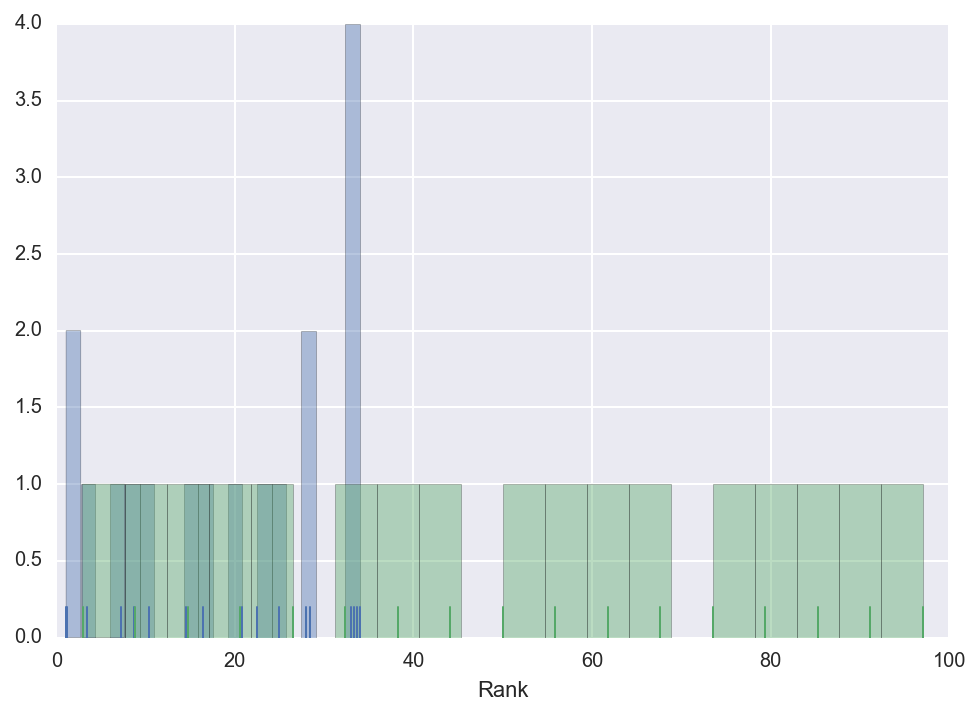

In [33]:
#The percentile is helpful in comparing values to the average. There are various datasets with
#different values which makes it difficult to find what the percentile of the values are. By
#setting the values in relative to the mean its easier to see which values are ranked higher
#or lower.

sns.distplot(drug['marijuana-use'], bins=20, kde=False, rug=True);
drug['Rank'] = [stats.percentileofscore(drug['marijuana-use'], a, 'mean') for a in drug['marijuana-use']]
print drug['Rank']
sns.distplot(drug['Rank'], bins = 20, kde= False, rug = True)

#Converting raw scores to percentile makes it easier to visualize the value against the mean.
#since all the values are normalize to the mean. With raw scores its hard to see which values 
#are considered good since every dataset is different. With ranks we can see that a higher rank
#means the value is considered good, and a lower rank means the value is considered low.